# Smart Diabetes Risk Classifier - EndSem Project

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score

In [6]:
df = pd.read_csv("diabetes.csv")
df['BMI_Category'] = df['BMI'].apply(lambda bmi: "Underweight" if bmi < 18.5 else
                                     "Normal" if bmi < 25 else
                                     "Overweight" if bmi < 30 else "Obese")
df = pd.get_dummies(df, columns=['BMI_Category'], drop_first=True)

In [7]:
df_reduced = df.drop(['Insulin', 'SkinThickness'], axis=1)
X = df_reduced.drop("Outcome", axis=1)
y = df_reduced["Outcome"]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [8]:
lr = LogisticRegression()
dt = DecisionTreeClassifier(random_state=42)
rf = RandomForestClassifier(random_state=42)

lr.fit(X_train, y_train)
dt.fit(X_train, y_train)
rf.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)
y_pred_dt = dt.predict(X_test)
y_pred_rf = rf.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

Logistic Regression Accuracy: 0.7402597402597403
Decision Tree Accuracy: 0.7337662337662337
Random Forest Accuracy: 0.7662337662337663


In [9]:
# Logistic Regression Scores
print("🔷 Logistic Regression:")
print(classification_report(y_test, y_pred_lr))

# Decision Tree Scores
print("🟠 Decision Tree:")
print(classification_report(y_test, y_pred_dt))

# Random Forest Scores
print("🟢 Random Forest:")
print(classification_report(y_test, y_pred_rf))


🔷 Logistic Regression:
              precision    recall  f1-score   support

           0       0.81      0.78      0.79        99
           1       0.63      0.67      0.65        55

    accuracy                           0.74       154
   macro avg       0.72      0.73      0.72       154
weighted avg       0.75      0.74      0.74       154

🟠 Decision Tree:
              precision    recall  f1-score   support

           0       0.80      0.79      0.79        99
           1       0.62      0.64      0.63        55

    accuracy                           0.73       154
   macro avg       0.71      0.71      0.71       154
weighted avg       0.73      0.73      0.73       154

🟢 Random Forest:
              precision    recall  f1-score   support

           0       0.83      0.80      0.81        99
           1       0.66      0.71      0.68        55

    accuracy                           0.77       154
   macro avg       0.75      0.75      0.75       154
weighted avg     

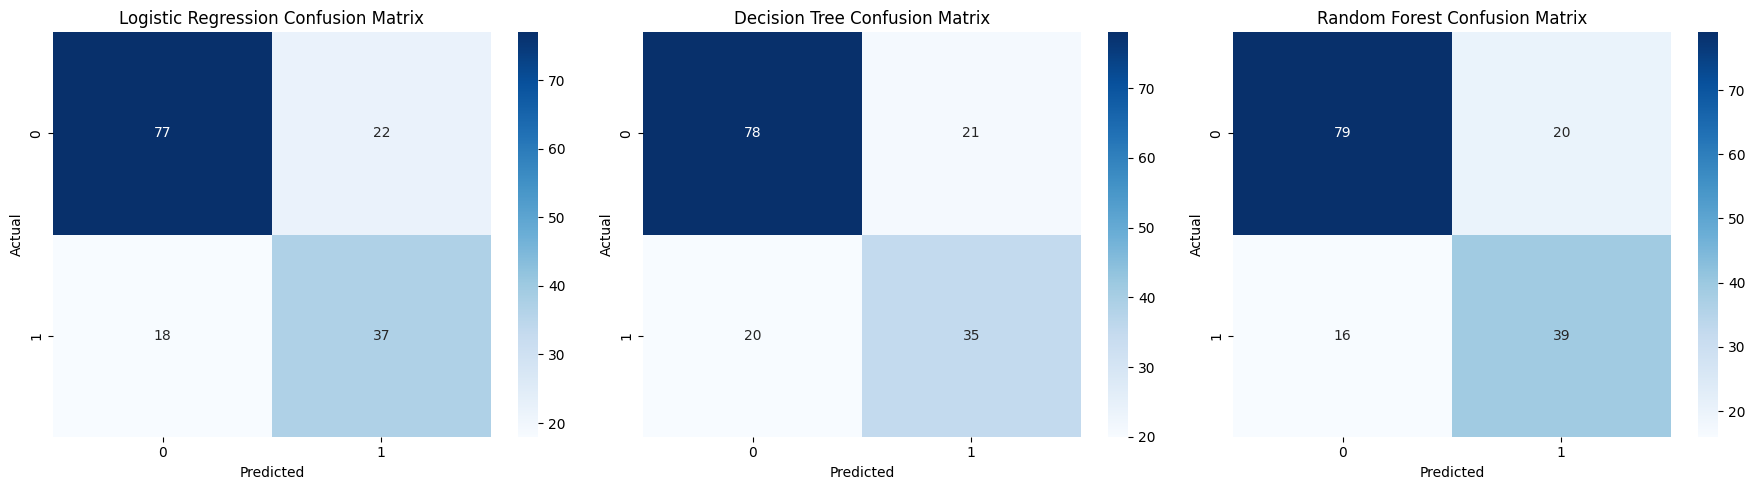

In [10]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
models = {'Logistic Regression': y_pred_lr, 'Decision Tree': y_pred_dt, 'Random Forest': y_pred_rf}
for ax, (title, y_pred) in zip(axes, models.items()):
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_title(f'{title} Confusion Matrix')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')
plt.tight_layout()
plt.savefig("confusion_matrices.png")
plt.show()

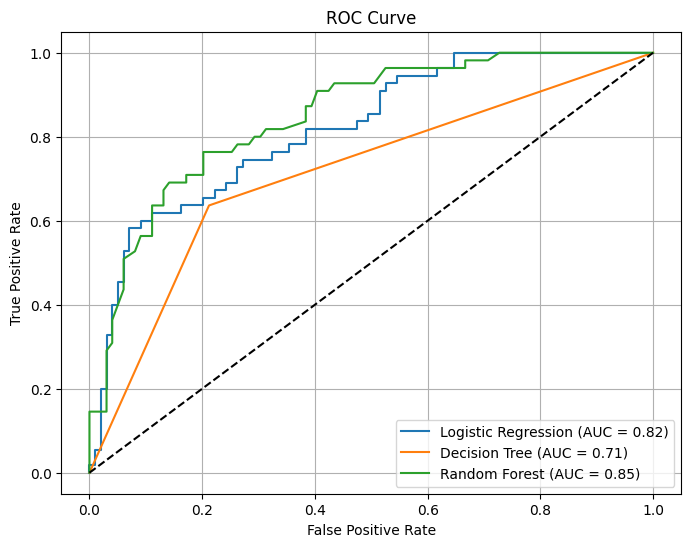

In [11]:
y_prob_lr = lr.predict_proba(X_test)[:, 1]
y_prob_dt = dt.predict_proba(X_test)[:, 1]
y_prob_rf = rf.predict_proba(X_test)[:, 1]

fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_prob_dt)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)

plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, label=f"Logistic Regression (AUC = {auc(fpr_lr, tpr_lr):.2f})")
plt.plot(fpr_dt, tpr_dt, label=f"Decision Tree (AUC = {auc(fpr_dt, tpr_dt):.2f})")
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {auc(fpr_rf, tpr_rf):.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.savefig("roc_curve.png")
plt.show()

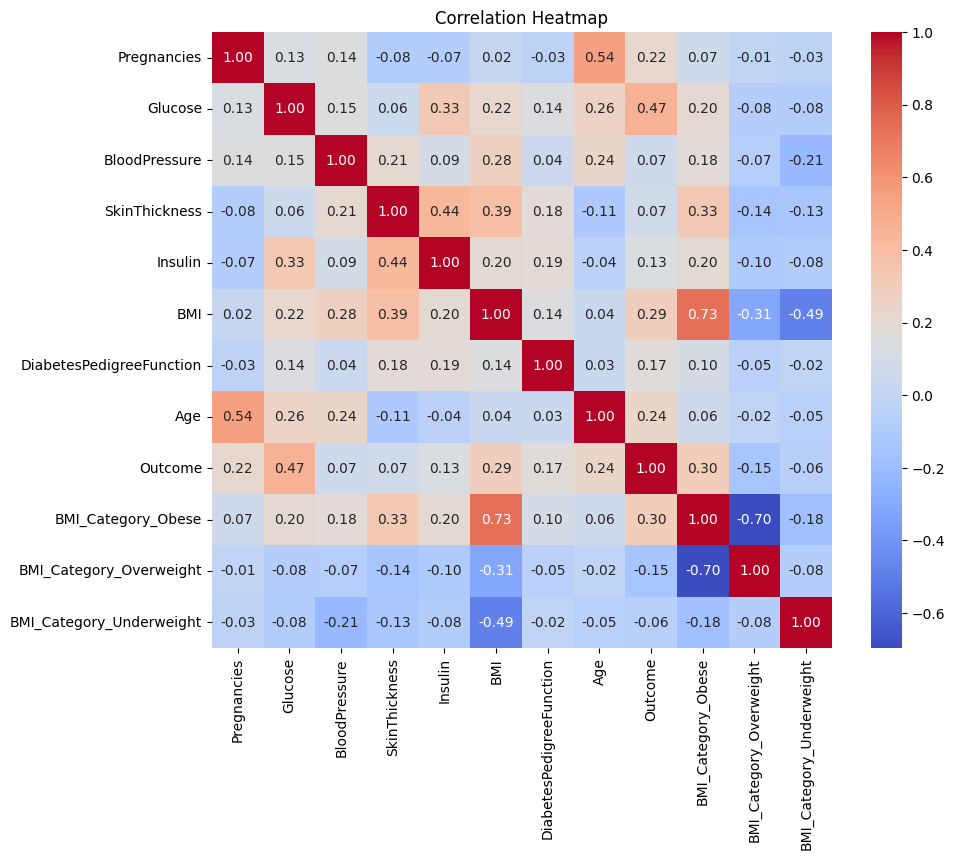

In [12]:
plt.figure(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.savefig("correlation_heatmap.png")
plt.show()